<a href="https://colab.research.google.com/github/pallmallking/Youtube_Analysis/blob/main/Youtube_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
comments = pd.read_csv(r'/content/UScomments.csv' , on_bad_lines = "skip", dtype={'likes': str, 'replies': str})

In [25]:
# Take a comprehensive sample of the comments DataFrame
comments_sampled = comments.sample(n=10000, random_state=42).reset_index(drop=True)

# Display the first few rows of the sampled DataFrame
display(comments_sampled.head())

# Display the shape of the sampled DataFrame
print(f"Shape of the sampled DataFrame: {comments_sampled.shape}")

,video_id,comment_text,likes,replies
0,7nh2Ra-5kY8,#Respect,1,0
1,wAcD3mIjZcc,Nick Jonas is just the cutest,0,0
2,Lk7iJthBk6I,Wow your amazing agghh sooo talented 😳🙌,0,0
3,s7u5igc-lFg,"Still is, REAL MEN WEAR PINK ;)",0,0
4,7KS2oJPzeZk,"Omg, I just found out that she lives in my tow...",0,0


Shape of the sampled DataFrame: (10000, 4)


In [19]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [21]:
comments.isnull().sum()

,0
video_id,0
comment_text,26
likes,0
replies,0


In [23]:
comments.dropna(inplace=True)

In [24]:
comments.isnull().sum()

,0
video_id,0
comment_text,0
likes,0
replies,0


In [26]:
# Save the sampled DataFrame to a new CSV file
comments_sampled.to_csv('UScomments_sampled.csv', index=False)

# Replace the original comments DataFrame with the sampled DataFrame
comments = comments_sampled

# Display the head of the updated comments DataFrame to confirm the change
display(comments.head())

# Print the shape of the updated comments DataFrame
print(f"Shape of the updated comments DataFrame: {comments.shape}")

,video_id,comment_text,likes,replies
0,7nh2Ra-5kY8,#Respect,1,0
1,wAcD3mIjZcc,Nick Jonas is just the cutest,0,0
2,Lk7iJthBk6I,Wow your amazing agghh sooo talented 😳🙌,0,0
3,s7u5igc-lFg,"Still is, REAL MEN WEAR PINK ;)",0,0
4,7KS2oJPzeZk,"Omg, I just found out that she lives in my tow...",0,0


Shape of the updated comments DataFrame: (10000, 4)


Perform Sentiment Analysis


# Task
Perform sentiment analysis on the 'comment_text' column of the dataset.

## Install necessary libraries

### Subtask:
Install any libraries required for sentiment analysis that are not already available (e.g., NLTK, TextBlob).


**Reasoning**:
Install the necessary libraries and download NLTK data for sentiment analysis.



In [27]:
!pip install textblob nltk

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## Prepare the text data

### Subtask:
Clean and preprocess the 'comment_text' column (e.g., remove punctuation, convert to lowercase, handle stop words).


**Reasoning**:
Convert the 'comment_text' column to lowercase, remove punctuation, and remove stop words, storing the result in a new column.



In [28]:
import re
from nltk.corpus import stopwords
from textblob import TextBlob

# Convert to lowercase
comments['cleaned_comment_text'] = comments['comment_text'].str.lower()

# Remove punctuation
comments['cleaned_comment_text'] = comments['cleaned_comment_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Remove stop words
stop_words = set(stopwords.words('english'))
comments['cleaned_comment_text'] = comments['cleaned_comment_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Display the first few rows with the new column
display(comments.head())

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


**Reasoning**:
The previous command failed because the 'stopwords' resource was not downloaded. Download the 'stopwords' resource and then re-run the cleaning and preprocessing steps.



In [29]:
import nltk
nltk.download('stopwords')

import re
from nltk.corpus import stopwords
from textblob import TextBlob

# Convert to lowercase
comments['cleaned_comment_text'] = comments['comment_text'].str.lower()

# Remove punctuation
comments['cleaned_comment_text'] = comments['cleaned_comment_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Remove stop words
stop_words = set(stopwords.words('english'))
comments['cleaned_comment_text'] = comments['cleaned_comment_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Display the first few rows with the new column
display(comments.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,video_id,comment_text,likes,replies,cleaned_comment_text
0,7nh2Ra-5kY8,#Respect,1,0,respect
1,wAcD3mIjZcc,Nick Jonas is just the cutest,0,0,nick jonas cutest
2,Lk7iJthBk6I,Wow your amazing agghh sooo talented 😳🙌,0,0,wow amazing agghh sooo talented
3,s7u5igc-lFg,"Still is, REAL MEN WEAR PINK ;)",0,0,still real men wear pink
4,7KS2oJPzeZk,"Omg, I just found out that she lives in my tow...",0,0,omg found lives town goes school really close


## Perform sentiment analysis

### Subtask:
Apply a chosen sentiment analysis method to the preprocessed text data to get sentiment scores or labels (e.g., positive, negative, neutral).


**Reasoning**:
Define functions for sentiment analysis and apply them to the cleaned comment text to get sentiment polarity and labels, then display the updated DataFrame.



In [30]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment_polarity(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    return 0.0

# Apply the function to create the sentiment_polarity column
comments['sentiment_polarity'] = comments['cleaned_comment_text'].apply(get_sentiment_polarity)

# Function to get sentiment label based on polarity
def get_sentiment_label(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to create the sentiment_label column
comments['sentiment_label'] = comments['sentiment_polarity'].apply(get_sentiment_label)

# Display the first few rows with the new sentiment columns
display(comments.head())

,video_id,comment_text,likes,replies,cleaned_comment_text,sentiment_polarity,sentiment_label
0,7nh2Ra-5kY8,#Respect,1,0,respect,0.000000,neutral
1,wAcD3mIjZcc,Nick Jonas is just the cutest,0,0,nick jonas cutest,0.000000,neutral
2,Lk7iJthBk6I,Wow your amazing agghh sooo talented 😳🙌,0,0,wow amazing agghh sooo talented,0.466667,positive
3,s7u5igc-lFg,"Still is, REAL MEN WEAR PINK ;)",0,0,still real men wear pink,0.050000,positive
4,7KS2oJPzeZk,"Omg, I just found out that she lives in my tow...",0,0,omg found lives town goes school really close,0.200000,positive


## Analyze sentiment results

### Subtask:
Summarize and visualize the sentiment analysis results (e.g., count the number of positive, negative, and neutral comments, visualize sentiment distribution).


**Reasoning**:
Calculate the value counts of the 'sentiment_label' column and create a bar plot to visualize the distribution of sentiment labels as requested by the instructions.



Distribution of Sentiment Labels:
sentiment_label
neutral     4355
positive    4127
negative    1518
Name: count, dtype: int64


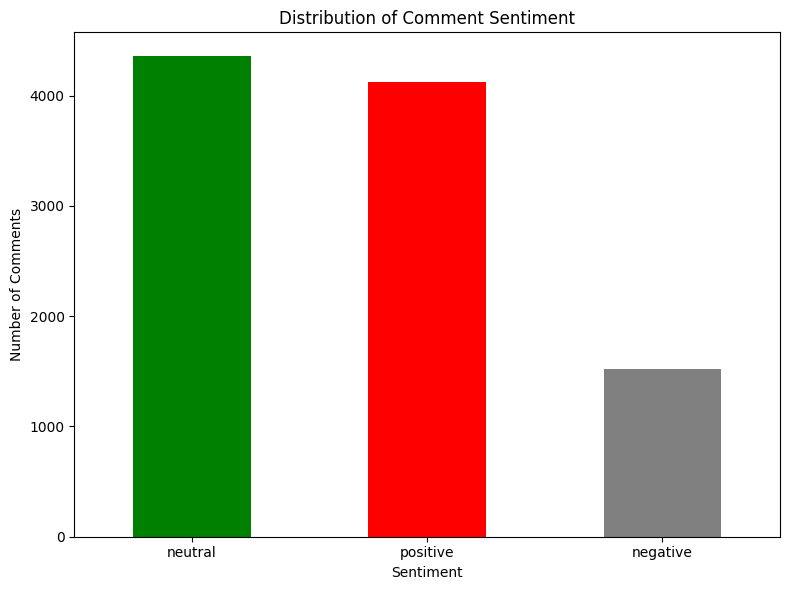

In [31]:
# Calculate value counts of sentiment labels
sentiment_counts = comments['sentiment_label'].value_counts()

# Print the value counts
print("Distribution of Sentiment Labels:")
print(sentiment_counts)

# Create a bar plot
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Distribution of Comment Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The required libraries for sentiment analysis, `textblob` and `nltk`, were successfully installed and necessary NLTK data (`punkt`, `averaged_perceptron_tagger`, and `stopwords`) were downloaded.
*   The 'comment\_text' column was cleaned by converting text to lowercase, removing punctuation, and removing stop words, and stored in a new column named 'cleaned\_comment\_text'.
*   Sentiment analysis was performed using `TextBlob`, adding two new columns: `sentiment\_polarity` (numerical score) and `sentiment\_label` (categorical: 'positive', 'negative', or 'neutral').
*   The distribution of sentiment labels was found to be: Neutral: 4355 comments, Positive: 4127 comments, and Negative: 1518 comments.
*   A bar plot visualizing the distribution of comment sentiment was successfully generated, showing that the majority of comments are neutral or positive.

### Insights or Next Steps

*   The dataset has a balanced distribution of neutral and positive comments, with fewer negative comments. Further analysis could explore features that distinguish negative comments from others.
*   Consider using a more advanced sentiment analysis model trained on social media or comment data to potentially improve the accuracy of sentiment classification, especially for nuanced or sarcastic language.
